<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». 
**Цель:** разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание данных
**Признаки:**
* пол;
* возраст застрахованного;
* зарплата застрахованного;
* количество членов его семьи;

**Целевой признак:**
* количество страховых выплат клиенту за последние 5 лет;

# Основные этапы
* Загрузка и подготвка данных.
* Исследование баланса классов, обучение модели без учёта дисбаланса.
* Улучшение качества модели, учитывая дисбаланс классов. Обучение разных моделей.
* Финальное тестирование.

In [103]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Загрузка данных

In [2]:
df = pd.read_csv('/datasets/insurance.csv') #исходные выборка;

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df = df.rename(columns={'Пол': 'gender', 
                        'Возраст': 'age', 
                        'Зарплата': 'salary', 
                        'Члены семьи': 'family_members',
                        'Страховые выплаты': 'payments',})
df.columns

Index(['gender', 'age', 'salary', 'family_members', 'payments'], dtype='object')

In [5]:
# напишем функцию, которая облегчит получение общей информации о файлах
def prep(data):
    print('Общая информация о файле')
    print(data.info())
    print('*'*50)
    print('Пропуски')
    print(data.isna().sum())
    print('*'*50)
    print('Дубликаты')
    print(data.duplicated().sum(),
         ',в процентах: ', round(data.duplicated().sum()/len(data)*100, 2),'%')
    print('*'*50)

In [6]:
# получаем общюю информацию, наличие пропусков и дубликатов в файлах
prep(df)

Общая информация о файле
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          5000 non-null   int64  
 1   age             5000 non-null   float64
 2   salary          5000 non-null   float64
 3   family_members  5000 non-null   int64  
 4   payments        5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
**************************************************
Пропуски
gender            0
age               0
salary            0
family_members    0
payments          0
dtype: int64
**************************************************
Дубликаты
153 ,в процентах:  3.06 %
**************************************************


In [7]:
# удалим дубликаты
df = df.drop_duplicates()
df.shape

(4847, 5)

In [8]:
# выведем краткую описательную статистику
df.describe()

,gender,age,salary,family_members,payments
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


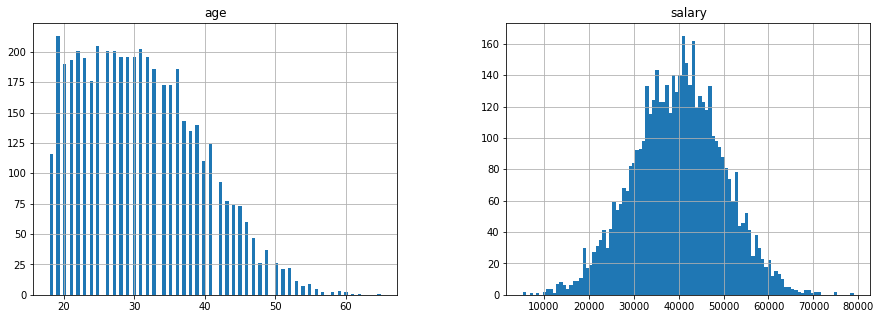

In [92]:
# посмотрим, как распределяются данные в признаках
df[['age', 'salary']].hist(bins=100, figsize=(15,5));

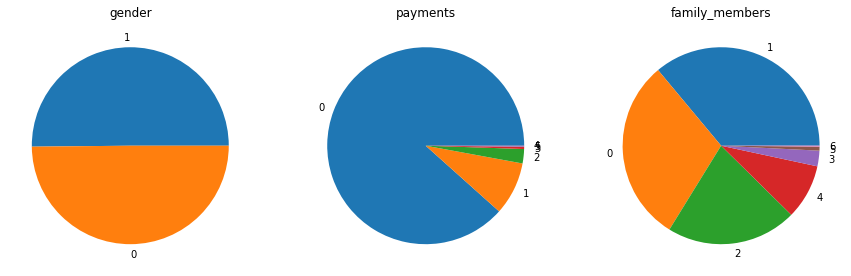

In [82]:

# create a figure with two subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# plot each pie chart in a separate subplot
ax1.pie(df['gender'].value_counts(), labels = df['gender'].unique())
ax1.set_title('gender')
ax2.pie(df['payments'].value_counts(), labels = df['payments'].unique())
ax2.set_title('payments')
ax3.pie(df['family_members'].value_counts(), labels = df['family_members'].unique())
ax3.set_title('family_members')

plt.show()

In [43]:
# посмотрим внимательней на наш таргет
df['payments'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'

0    88.38%
1     8.73%
2     2.35%
3     0.37%
4     0.14%
5     0.02%
Name: payments, dtype: object

In [100]:
# посмотрим корреляцию признаков
df.corr(method='spearman').style.background_gradient(cmap='coolwarm')

,gender,age,salary,family_members,payments
gender,1.000000,-0.000092,0.012079,-0.004594,0.000964
age,-0.000092,1.000000,-0.018972,-0.003414,0.555655
salary,0.012079,-0.018972,1.000000,-0.027361,-0.003878
family_members,-0.004594,-0.003414,-0.027361,1.000000,-0.032201
payments,0.000964,0.555655,-0.003878,-0.032201,1.000000


***
**Вывод по разделу:**

При подготовке данных обнаружили *3%* пропусков, которые затем были удалены. Привели к змеиному регистру названия столбцов.
В ходе первичного анализа можно отметить, что данные распредлены нормально, нет мультиколлинеарности (вероятно, это знание пригодится нам в будущем), зато есть средняя положительная корреляция между целевым признаком `'payments'` и признаком `age`. 

Теперь можно приступать к следующему шагу.
***

## Умножение матриц

**Вопрос:** Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

**Ответ:** Не изменится.

**Обоснование:**

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$


Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

Объединим две эти формулы:

$$
a = X(X^T X)^{-1} X^T y
$$

Преобразованная матрица будет выглядеть так:

$$
X^{i} = XP
$$

Подставим преобразованную матрицу в формулу выше в виде произведения двух матриц:

$$
a^{i} = XP((XP)^T XP)^{-1} (XP)^T y
$$

Раскроем скобки, используя свойство $(AB)^{-1}=B^{-1}A^{-1}$ и $(AB)^{T}=B^{T}A^{T}$:

$$
a^{i} = XP(P^TX^T XP)^{-1}P^TX^T y
$$
$$
a^{i} = XPP^{-1}(X^TX)^{-1}(P^T)^{-1}P^TX^T y
$$

Воспользуемся свойством квадратных $A^{-1}A=AA^{-1}=A$ и единичных матриц $AE=EA=A$

$$
a^{i} = XE(X^TX)^{-1}E X^T y
$$
$$
a^{i} = X(X^TX)^{-1} X^T y
$$

Вернемся к виду предсказания:

$$
a^{i} = Xw
$$

$a^{i} = a$, значит можем умножать на квадратные обратимые матрицы без потери качества модели.

## Алгоритм преобразования

**Алгоритм**:
1. Создание случайной квадратной матрицы размерности n, где n количество признаков.
2. Проверка матрицы на обратимость
3. Умножение признаков на матрицу

**Обоснование**

см. предыдущий раздел.

## Проверка алгоритма

Задачей данного проекта является разработка метода шифрования данных, а не создание модели, поэтому опустим шаг разбиения данных на train/test. 

In [ ]:
# объявим переменные: с признаками и целевым признаком
features = df.drop(['payments'], axis=1)
target = df['payments']

In [ ]:
# сгенерируем случайную матрицу
matrix = np.random.normal(size=(4, 4))
matrix

In [ ]:
# проверим, что наша матрица обратима, если да, увидим массив, если нет, получим ошибку
inv(matrix)

In [ ]:
# умножим случайную обратимую матрицу на наши признаки
features_mult = features.dot(matrix)

In [ ]:
# обучим модель на преобразованных данных и проверим её качество
model = LinearRegression()
model.fit(features_mult, target)
predictions = model.predict(features_mult)
print(f'R2 = {r2_score(target, predictions):.4f}')
print(f'MSE = {mean_squared_error(target, predictions):.4f}')

In [ ]:
# обучим модель на исходных данных и проверим её качество
model = LinearRegression()
model.fit(features, target)
predictions = model.predict(features)
print(f'R2 = {r2_score(target, predictions):.4f}')
print(f'MSE = {mean_squared_error(target, predictions):.4f}')

**Промежуточный вывод**

Равенство метрик моделей, одна из которых обучена на исходных данных, а вторая на преобразованных, подтверждает работоспосбность алгоритма.

## Вывод

Целью проекта было разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

В ходе выполнения проекта:
1. Привели данные в приемлимы вид
2. Теоретически обосновали алгоритм преобразования
3. Описали этапы алгоритма
4. На практике убедились, что алгоритм работает 